In [1]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm
import terra
import numpy as np
import meerkat as mk
import pandas as pd
import seaborn as sns

from domino.sdm.george import GeorgeSDM

In [2]:
from domino.data.celeb import build_celeb_df, build_celeb_dp

df = build_celeb_df("/home/common/datasets/celeba/")

task: build_celeb_df, run_id=1457


In [5]:
out = build_celeb_dp(df).load()

task: build_celeb_dp, run_id=1459


In [6]:
out

,file (NumpyArrayColumn),identity (NumpyArrayColumn),5_o_clock_shadow (NumpyArrayColumn),arched_eyebrows (NumpyArrayColumn),attractive (NumpyArrayColumn),bags_under_eyes (NumpyArrayColumn),bald (NumpyArrayColumn),bangs (NumpyArrayColumn),big_lips (NumpyArrayColumn),big_nose (NumpyArrayColumn),...,wearing_lipstick (NumpyArrayColumn),wearing_necklace (NumpyArrayColumn),wearing_necktie (NumpyArrayColumn),young (NumpyArrayColumn),img_path (NumpyArrayColumn),image_id (NumpyArrayColumn),split (NumpyArrayColumn),index (ListColumn),img (ImageColumn),input (ImageColumn)
0,000001.jpg,2880,0,1,1,0,0,0,0,0,...,1,0,0,1,/home/common/datasets/celeba/img_align_celeba/...,000001.jpg,train,'0',ImagePathCell(/home/common/datasets/celeba/img...,ImagePathCell(/home/common/datasets/celeba/img...
1,000002.jpg,2937,0,0,0,1,0,0,0,1,...,0,0,0,1,/home/common/datasets/celeba/img_align_celeba/...,000002.jpg,train,'1',ImagePathCell(/home/common/datasets/celeba/img...,ImagePathCell(/home/common/datasets/celeba/img...
2,000003.jpg,8692,0,0,0,0,0,0,1,0,...,0,0,0,1,/home/common/datasets/celeba/img_align_celeba/...,000003.jpg,train,'2',ImagePathCell(/home/common/datasets/celeba/img...,ImagePathCell(/home/common/datasets/celeba/img...
3,000004.jpg,5805,0,0,1,0,0,0,0,0,...,1,1,0,1,/home/common/datasets/celeba/img_align_celeba/...,000004.jpg,train,'3',ImagePathCell(/home/common/datasets/celeba/img...,ImagePathCell(/home/common/datasets/celeba/img...
4,000005.jpg,9295,0,1,1,0,0,0,1,0,...,1,0,0,1,/home/common/datasets/celeba/img_align_celeba/...,000005.jpg,train,'4',ImagePathCell(/home/common/datasets/celeba/img...,ImagePathCell(/home/common/datasets/celeba/img...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,202595.jpg,9761,0,0,1,0,0,0,1,0,...,1,0,0,1,/home/common/datasets/celeba/img_align_celeba/...,202595.jpg,test,'202594',ImagePathCell(/home/common/datasets/celeba/img...,ImagePathCell(/home/common/datasets/celeba/img...
202595,202596.jpg,7192,0,0,0,0,0,1,1,0,...,0,0,0,1,/home/common/datasets/celeba/img_align_celeba/...,202596.jpg,test,'202595',ImagePathCell(/home/common/datasets/celeba/img...,ImagePathCell(/home/common/datasets/celeba/img...
202596,202597.jpg,9852,0,0,0,0,0,0,0,0,...,0,0,0,1,/home/common/datasets/celeba/img_align_celeba/...,202597.jpg,test,'202596',ImagePathCell(/home/common/datasets/celeba/img...,ImagePathCell(/home/common/datasets/celeba/img...
202597,202598.jpg,5570,0,1,1,0,0,0,1,0,...,1,0,0,1,/home/common/datasets/celeba/img_align_celeba/...,202598.jpg,test,'202597',ImagePathCell(/home/common/datasets/celeba/img...,ImagePathCell(/home/common/datasets/celeba/img...


In [2]:
data_dp, _ = terra.out(1412, load=True)
data_dp["activation_model.layer4"] = data_dp["activation_layer4"]

In [3]:
sdm = GeorgeSDM(config={"n_slices": 5})

In [4]:
sdm.fit(data_dp)

In [5]:
out = sdm.transform(data_dp)

<AxesSubplot:xlabel='george_umap_0', ylabel='george_umap_1'>

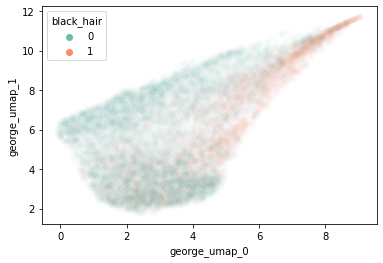

In [24]:
df = out[["george_umap_0", "george_umap_1", "george_slices", "arched_eyebrows", "black_hair"]].to_pandas()
sns.scatterplot(
    data=df, 
    x="george_umap_0", 
    y="george_umap_1",
    alpha=0.01,
    palette="Set2",
    hue="black_hair"
)

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(out["arched_eyebrows"], out["george_slice_1"])

0.6110107605304324

{'dp': <terra.io.Artifact at 0x7fc146f21fd0>,
 'split': 'test',
 'layers': {'layer4': 'model.layer4'},
 'target': 'arched_eyebrows',
 'correlate': 'black_hair',
 'corr': 0.6000000000000001,
 'num_examples': 30000.0,
 'model': <terra.io.Artifact at 0x7fc146f21f10>,
 'run_dir': '/home/sabri/terra/slice/tasks/evaluate/train/score_model/_runs/1412',
 'num_workers': 6,
 'batch_size': 512}

In [1]:
import ray.tune as tune